In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<AxesSubplot:xlabel='class', ylabel='count'>

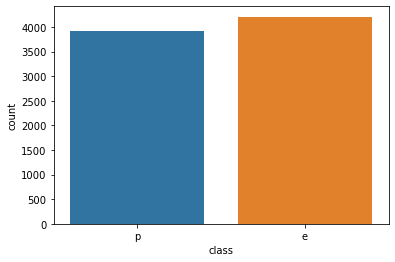

In [4]:
sns.countplot(data=df,x='class')

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.describe().transpose().reset_index().sort_values('unique')

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


In [7]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

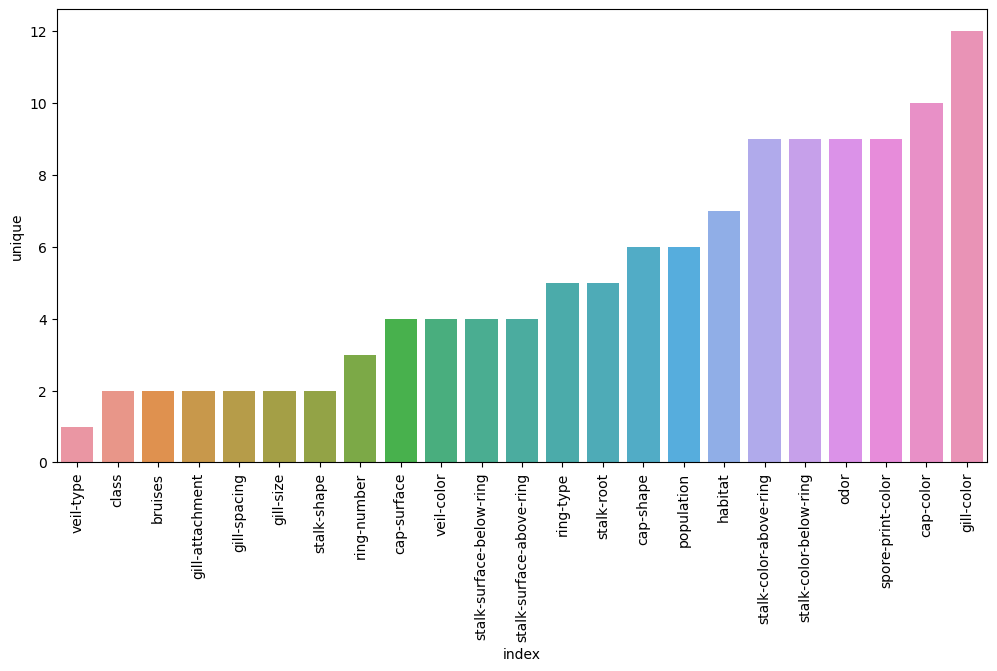

In [11]:
plt.figure(figsize=(12,6),dpi=100)
sns.barplot(data=feat_uni, x='index',y='unique')
plt.xticks(rotation=90);

In [12]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [13]:
X = df.drop('class',axis=1)
X = pd.get_dummies(X,drop_first=True)

In [16]:
y = df['class']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.15, random_state=101)

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
model = AdaBoostClassifier(n_estimators=1)

In [22]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [23]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [24]:
y_pred = model.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [28]:
X.columns[model.feature_importances_.argmax()]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

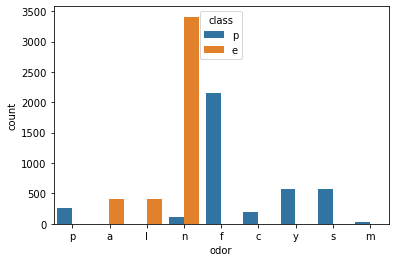

In [30]:
sns.countplot(data=df,x='odor',hue='class')

In [31]:
len(X.columns)

95

In [33]:
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test,preds)
    error_rates.append(err)

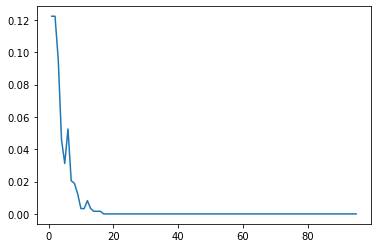

In [35]:
plt.plot(range(1,96),error_rates)

In [36]:
X.columns[model.feature_importances_.argmax()]

'spore-print-color_w'

In [37]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,
                    columns=['Importance'])

In [44]:
imp_feats = feats[feats['Importance']>0]

In [45]:
imp_feats

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


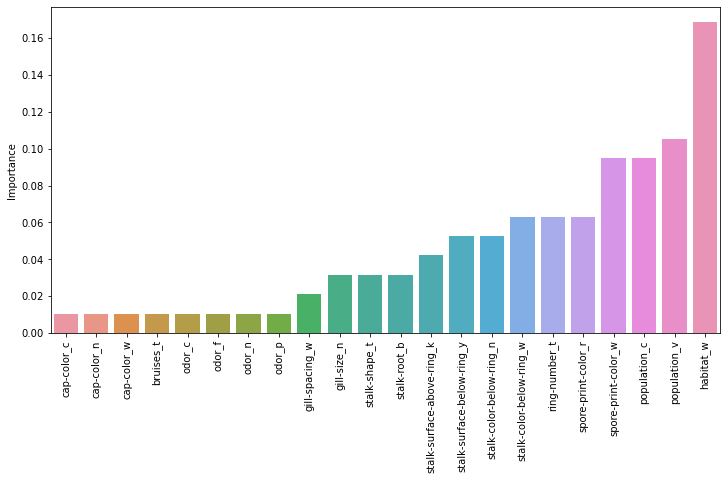

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);

In [ ]:
aaa